<a href="https://colab.research.google.com/github/gusmaomarcos/machine-learning-avancada/blob/main/DeepLearning_Previsao_com_Keras_passageiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (9, 5)
mpl.rcParams['font.size'] = 10

In [ ]:
url = "https://raw.githubusercontent.com/alura-cursos/deeptime/aula1/Passageiros.csv"

passageiros = pd.read_csv(url)

In [ ]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


<Axes: xlabel='tempo', ylabel='passageiros'>

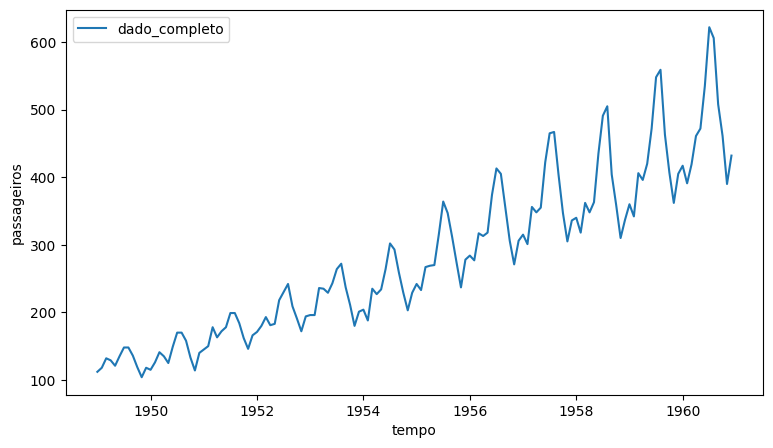

In [ ]:
sns.lineplot(data=passageiros, x='tempo', y='passageiros', label='dado_completo')

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
sc = StandardScaler()

In [ ]:
sc.fit(passageiros)

StandardScaler()

In [ ]:
dado_escalado = sc.transform(passageiros)

In [ ]:
x = dado_escalado[:, 0]
y = dado_escalado[:, 1]

Text(0.5, 0, 'data')

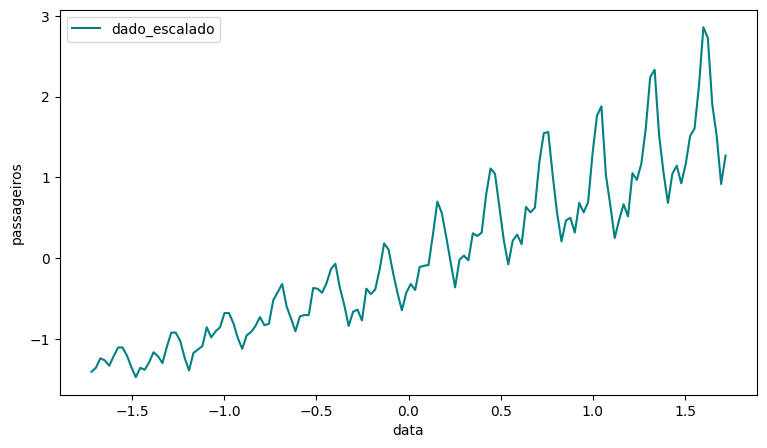

In [ ]:
sns.lineplot(x=x, y=y, label='dado_escalado', color='teal')
plt.ylabel('passageiros')
plt.xlabel('data')

In [ ]:
tamanho_treino = int(len(passageiros) * 0.9)
tamanho_teste = len(passageiros) - tamanho_treino

In [ ]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

Text(0.5, 0, 'data')

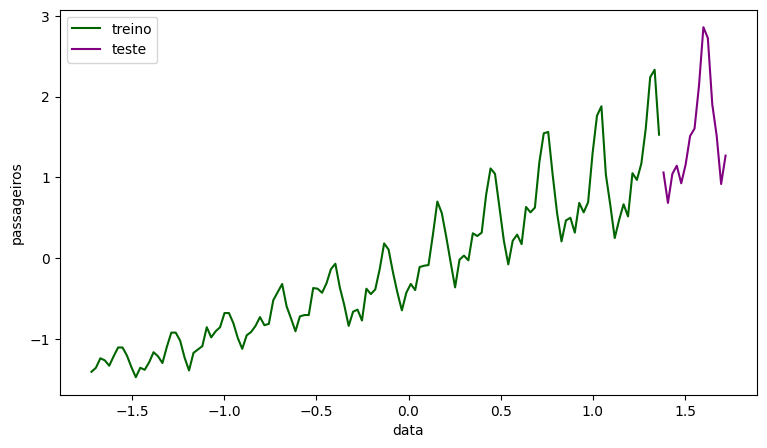

In [ ]:
sns.lineplot(x=xtreino, y=ytreino, label='treino', color='darkgreen')
sns.lineplot(x=xteste, y=yteste, label='teste', color='purple')
plt.ylabel('passageiros')
plt.xlabel('data')

Aplicando regressão linear com rede neural:

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(Dense(1, activation='linear', input_dim=1, kernel_initializer='Ones', use_bias=False))

In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 1         
                                                                 
Total params: 1 (4.00 Byte)
Trainable params: 1 (4.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
regressor.fit(xtreino, ytreino)

5/5 [==============================] - 1s 12ms/step - loss: 0.1285


In [ ]:
y_predict = regressor.predict(xtreino)

5/5 [==============================] - 0s 3ms/step


<Axes: >

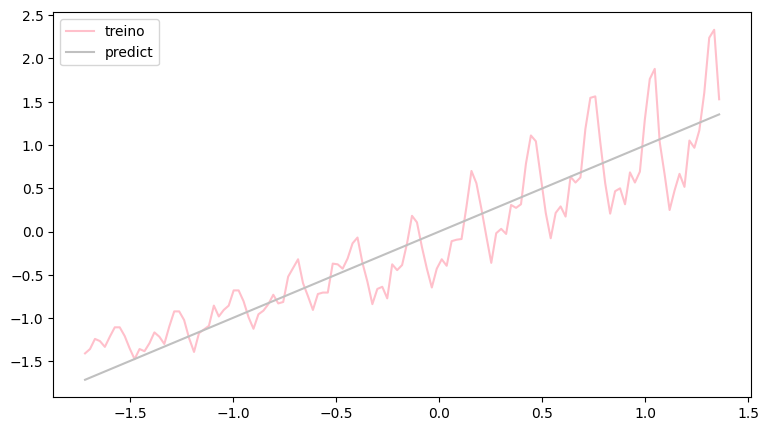

In [ ]:
sns.lineplot(x=xtreino, y=ytreino, label='treino', color='pink')
sns.lineplot(x=xtreino, y=y_predict[:,0], label='predict', color='silver')

In [ ]:
d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}

In [ ]:
resultados = pd.DataFrame(data=d)
resultados

,tempo,passageiros
0,-1.720064,-1.712778
1,-1.696007,-1.688823
2,-1.671950,-1.664868
3,-1.647894,-1.640913
4,-1.623837,-1.616958
...,...,...
124,1.262984,1.257634
125,1.287041,1.281589
126,1.311098,1.305544
127,1.335155,1.329499


In [ ]:
resultado_transf = sc.inverse_transform(resultados)
resultado_transf = pd.DataFrame(data=resultado_transf, columns=['tempo', 'passageiros'])
resultado_transf

,tempo,passageiros
0,1949.000000,75.537689
1,1949.083333,78.401470
2,1949.166667,81.265266
3,1949.250000,84.129062
4,1949.333333,86.992858
...,...,...
124,1959.333333,430.647541
125,1959.416667,433.511337
126,1959.500000,436.375119
127,1959.583333,439.238900


<Axes: xlabel='tempo', ylabel='passageiros'>

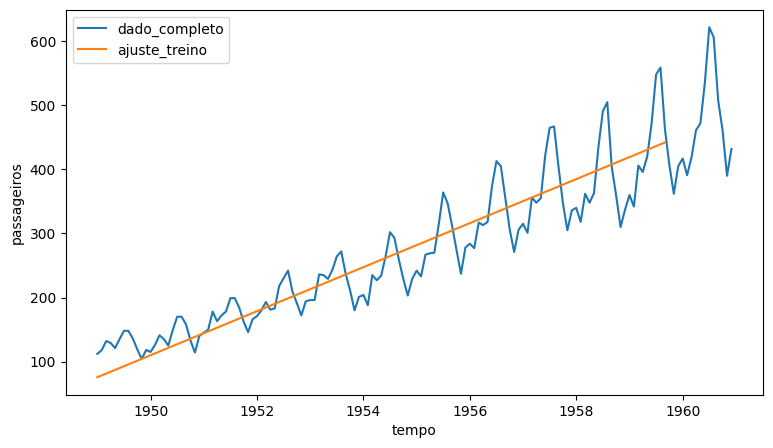

In [ ]:
sns.lineplot(data=passageiros, x='tempo', y='passageiros', label='dado_completo')
sns.lineplot(data=resultado_transf, x='tempo', y='passageiros', label='ajuste_treino')

In [ ]:
y_predict_teste = regressor.predict(xteste)

1/1 [==============================] - 0s 65ms/step


In [ ]:
e = {'tempo': xteste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=e)
resultados_teste

,tempo,passageiros
0,1.383268,1.377409
1,1.407325,1.401363
2,1.431382,1.425318
3,1.455439,1.449273
4,1.479496,1.473228
5,1.503553,1.497183
6,1.527609,1.521138
7,1.551666,1.545093
8,1.575723,1.569048
9,1.599780,1.593003


In [ ]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)
resultado_transf_teste = pd.DataFrame(data=resultado_transf_teste, columns=['tempo', 'passageiros'])
resultado_transf_teste

,tempo,passageiros
0,1959.750000,444.966478
1,1959.833333,447.830273
2,1959.916667,450.694055
3,1960.000000,453.557851
4,1960.083333,456.421647
5,1960.166667,459.285428
6,1960.250000,462.149224
7,1960.333333,465.013005
8,1960.416667,467.876787
9,1960.500000,470.740583


<Axes: xlabel='tempo', ylabel='passageiros'>

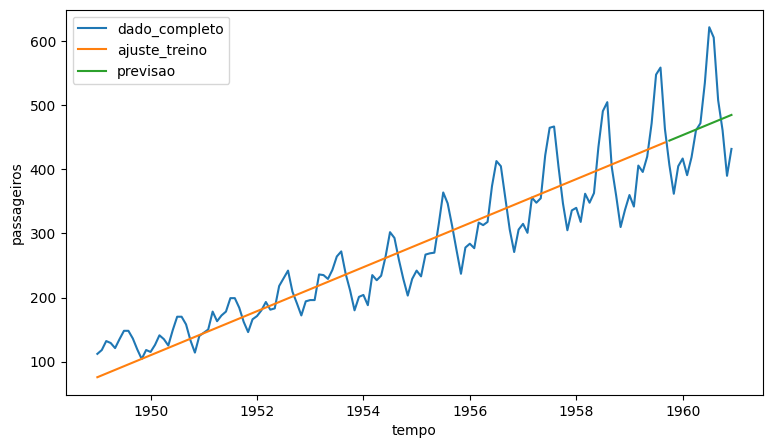

In [ ]:
sns.lineplot(data=passageiros, x='tempo', y='passageiros', label='dado_completo')
sns.lineplot(data=resultado_transf, x='tempo', y='passageiros', label='ajuste_treino')
sns.lineplot(data=resultado_transf_teste, x='tempo', y='passageiros', label='previsao')

In [ ]:
regressor2 = Sequential()

In [ ]:
regressor2.add(Dense(8, activation='sigmoid', input_dim=1, kernel_initializer='random_uniform', use_bias=False))
regressor2.add(Dense(8, activation='sigmoid', kernel_initializer='random_uniform', use_bias=False))
regressor2.add(Dense(1, activation='linear', kernel_initializer='random_uniform', use_bias=False))

In [ ]:
regressor2.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 8)                 8         
                                                                 
 dense_2 (Dense)             (None, 8)                 64        
                                                                 
 dense_3 (Dense)             (None, 1)                 8         
                                                                 
Total params: 80 (320.00 Byte)
Trainable params: 80 (320.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
regressor2.fit(xtreino, ytreino, epochs=200)

Epoch 1/200
5/5 [==============================] - 2s 10ms/step - loss: 0.8066
Epoch 2/200
5/5 [==============================] - 0s 10ms/step - loss: 0.8035
Epoch 3/200
5/5 [==============================] - 0s 4ms/step - loss: 0.8035
Epoch 4/200
5/5 [==============================] - 0s 4ms/step - loss: 0.8047
Epoch 5/200
5/5 [==============================] - 0s 4ms/step - loss: 0.8048
Epoch 6/200
5/5 [==============================] - 0s 5ms/step - loss: 0.8036
Epoch 7/200
5/5 [==============================] - 0s 3ms/step - loss: 0.8020
Epoch 8/200
5/5 [==============================] - 0s 8ms/step - loss: 0.8002
Epoch 9/200
5/5 [==============================] - 0s 5ms/step - loss: 0.7974
Epoch 10/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7964
Epoch 11/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7961
Epoch 12/200
5/5 [==============================] - 0s 4ms/step - loss: 0.7953
Epoch 13/200
5/5 [==============================] - 0s 7ms/

In [ ]:
y_predict2 = regressor2.predict(xtreino)

5/5 [==============================] - 0s 3ms/step


In [ ]:
y_predict2_teste = regressor2.predict(xteste)

1/1 [==============================] - 0s 28ms/step


<Axes: >

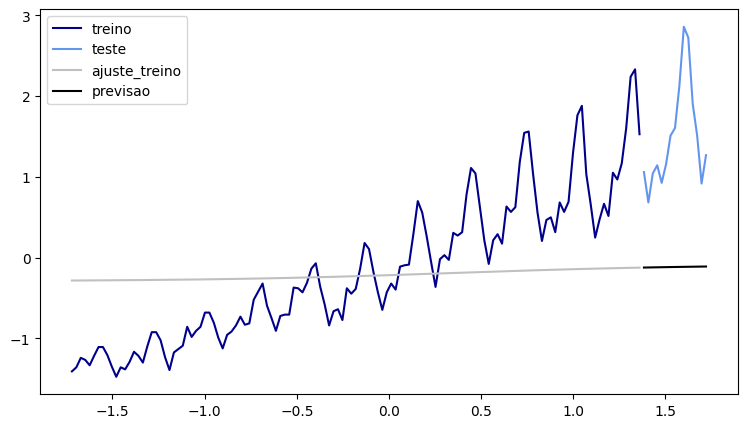

In [ ]:
sns.lineplot(x=xtreino, y=ytreino, label='treino', color='darkblue')
sns.lineplot(x=xteste, y=yteste, label='teste', color='cornflowerblue')
sns.lineplot(x=xtreino, y=y_predict2[:,0], label='ajuste_treino', color='silver')
sns.lineplot(x=xteste, y=y_predict2_teste[:,0], label='previsao', color='k')

In [ ]:
vetor = pd.DataFrame(ytreino)[0]

In [ ]:
def separa_dados(vetor, n_passos):
    x_novo, y_novo = [], []
    for i in range(n_passos, vetor.shape[0]):
        x_novo.append(list(vetor.loc[i-n_passos:i-1]))
        y_novo.append(vetor.loc[i])
    x_novo, y_novo = np.array(x_novo), np.array(y_novo)
    return x_novo, y_novo

In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 1)

In [ ]:
xtreino_novo[0:5]

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [ ]:
ytreino_novo[0:5]

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

In [ ]:
vetor2 = pd.DataFrame(yteste)[0]

In [ ]:
xteste_novo, yteste_novo = separa_dados(vetor2, 1)

In [ ]:
regressor3 = Sequential()

In [ ]:
regressor3.add(Dense(8, activation='linear', input_dim=1, kernel_initializer='Ones', use_bias=False))
regressor3.add(Dense(64, activation='sigmoid', kernel_initializer='random_uniform', use_bias=False))
regressor3.add(Dense(1, activation='linear', kernel_initializer='random_uniform', use_bias=False))

In [ ]:
regressor3.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
regressor3.fit(xtreino_novo, ytreino_novo, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 6ms/step - loss: 0.7790
Epoch 2/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7568
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7329
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7118
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 0.6897
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6672
Epoch 7/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6432
Epoch 8/100
4/4 [==============================] - 0s 4ms/step - loss: 0.6170
Epoch 9/100
4/4 [==============================] - 0s 4ms/step - loss: 0.5884
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 0.5607
Epoch 11/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5241
Epoch 12/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4909
Epoch 13/100
4/4 [==============================] - 0s 4ms/st

In [ ]:
y_predict_novo = regressor3.predict(xtreino_novo)

4/4 [==============================] - 0s 2ms/step


<Axes: xlabel='tempo', ylabel='0'>

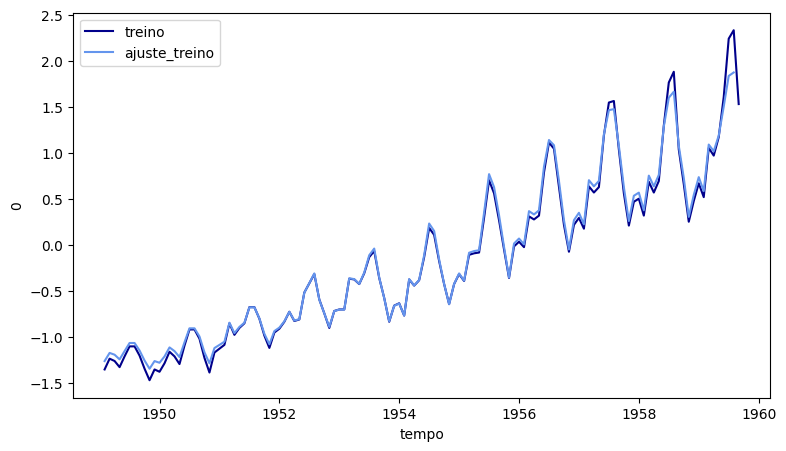

In [ ]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino', color='darkblue')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino', color='cornflowerblue')

In [ ]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

1/1 [==============================] - 0s 47ms/step


In [ ]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo', ylabel='0'>

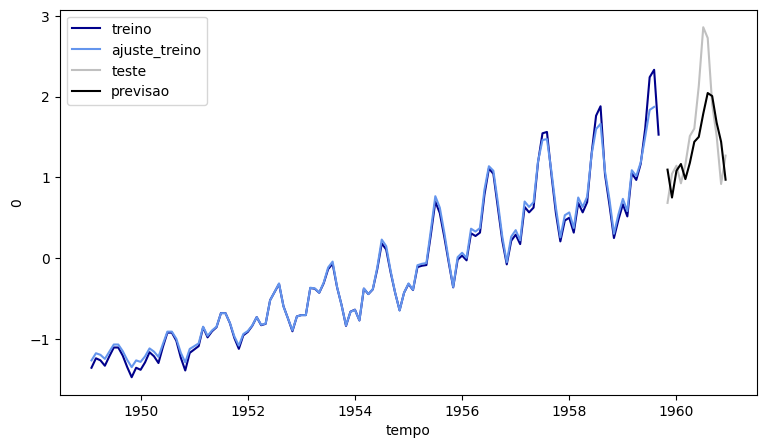

In [ ]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[1:129], label='treino', color='darkblue')
sns.lineplot(x='tempo', y=pd.DataFrame(y_predict_novo)[0], data=passageiros[1:129], label='ajuste_treino', color='cornflowerblue')

sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[130:144], label='teste', color='silver')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[130:144], label='previsao', color='k')

In [ ]:
xtreino_novo, ytreino_novo = separa_dados(vetor, 4)

In [ ]:
xtreino_novo[0:5]

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [ ]:
ytreino_novo[0:5]

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [ ]:
xteste_novo, yteste_novo = separa_dados(vetor2, 4)

In [ ]:
regressor4 = Sequential()

In [ ]:
regressor4.add(Dense(8, activation='linear', input_dim=4, kernel_initializer='Ones', use_bias=False))
regressor4.add(Dense(64, activation='sigmoid', kernel_initializer='random_uniform', use_bias=False))
regressor4.add(Dense(1, activation='linear', kernel_initializer='random_uniform', use_bias=False))

In [ ]:
regressor4.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
regressor4.fit(xtreino_novo, ytreino_novo, epochs=300)

Epoch 1/300
4/4 [==============================] - 0s 5ms/step - loss: 0.7424
Epoch 2/300
4/4 [==============================] - 0s 4ms/step - loss: 0.6598
Epoch 3/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5896
Epoch 4/300
4/4 [==============================] - 0s 3ms/step - loss: 0.5265
Epoch 5/300
4/4 [==============================] - 0s 3ms/step - loss: 0.4612
Epoch 6/300
4/4 [==============================] - 0s 3ms/step - loss: 0.3983
Epoch 7/300
4/4 [==============================] - 0s 3ms/step - loss: 0.3429
Epoch 8/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2877
Epoch 9/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2390
Epoch 10/300
4/4 [==============================] - 0s 3ms/step - loss: 0.2062
Epoch 11/300
4/4 [==============================] - 0s 4ms/step - loss: 0.1788
Epoch 12/300
4/4 [==============================] - 0s 3ms/step - loss: 0.1593
Epoch 13/300
4/4 [==============================] - 0s 5ms/st

In [ ]:
y_predict_novo = regressor4.predict(xtreino_novo)

4/4 [==============================] - 0s 2ms/step


In [ ]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

1/1 [==============================] - 0s 19ms/step


In [ ]:
resultado_treino = pd.DataFrame(y_predict_novo)[0]

In [ ]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

<Axes: xlabel='tempo'>

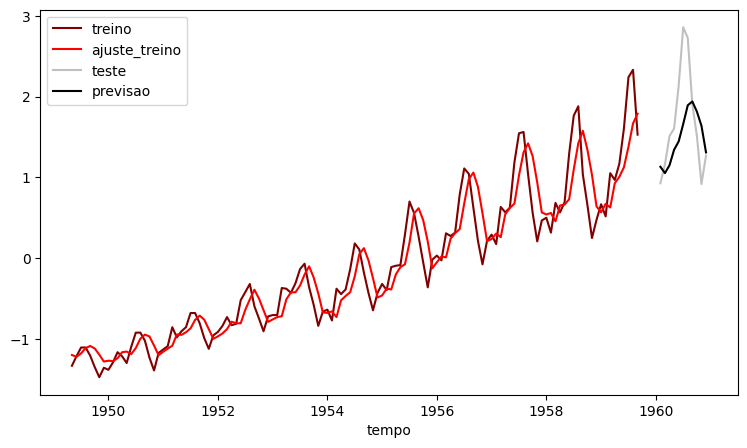

In [ ]:
sns.lineplot(x='tempo', y=ytreino_novo, data=passageiros[4:129], label='treino', color='maroon')
sns.lineplot(x='tempo', y=resultado_treino.values, data=passageiros[4:129], label='ajuste_treino', color='red')

sns.lineplot(x='tempo', y=yteste_novo, data=passageiros[133:144], label='teste', color='silver')
sns.lineplot(x='tempo', y=resultado.values, data=passageiros[133:144], label='previsao', color='k')